In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import shap
import warnings

# 경고 무시 설정
warnings.filterwarnings("ignore", message="Saving into deprecated binary model format.*")

In [ ]:
# 코랩 환경에서 한글 폰트 설치
!apt-get -qq install fonts-nanum

# 설치된 폰트를 Matplotlib에 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
plt.rc('font', family='NanumGothic')

# 폰트 캐시를 업데이트하여 새 폰트 인식
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
fm._load_fontmanager(try_read_cache=False)

print("한글 폰트 설정 완료")

Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
한글 폰트 설정 완료


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기 및 전처리
file_path = "/content/drive/MyDrive/ML/KICT-RO-DB-ML.xlsx"
temp_10 = pd.read_excel(file_path, sheet_name='1', skiprows=[1]).drop([0, 1], axis=0)

In [ ]:
temp_10

,생산량,원수수질,온도,생산수질,인입수 유량,생산수 유량,농축수 유량,회수율,인입 압력,농축수 압력,베셀 차압,평균 유속,에너지 소비량,분리막 모델,분리막 개수,베셀 개수
2,500,36000,10,25.3,1429,499.93,928.64,0.35,68.82,66.29,2.53,23.36,6.83,LG SW 400 GR,6,4
3,300,36000,10,25.9,750,299.86,450.14,0.4,72.26,69.24,3.01,24.02,6.27,LG SW 400 GR,7,2
4,300,36000,10,26.9,857,299.96,557.18,0.35,67.5,66.02,1.48,22.42,6.7,LG SW 400 GR,5,3
5,200,36000,10,28.8,500,199.91,300.09,0.4,70.15,69.02,1.13,22.41,6.09,LG SW 400 GR,5,2
6,200,36000,10,26.9,571,199.97,371.45,0.35,67.5,66.02,1.48,22.42,6.7,LG SW 400 GR,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,200,42000,10,16.8,571,199.85,371.58,0.35,92.11,90.65,1.46,25.46,9.14,LG SW 440 SR G2,4,2
237,100,42000,10,17.7,256,99.96,156.45,0.4,94.88,93.69,1.19,25.47,8.45,LG SW 440 SR G2,4,1
238,100,42000,10,16.8,286,99.92,185.79,0.35,92.11,90.65,1.46,25.46,9.14,LG SW 440 SR G2,4,1
239,50,42000,10,35.3,128,49.99,78.21,0.4,69.18,68.79,0.4,12.74,6.16,LG SW 440 SR G2,4,1


In [ ]:
# 데이터 결합 및 더미 변수 생성
total = pd.get_dummies(temp_10, columns=['분리막 모델'])
total

,생산량,원수수질,온도,생산수질,인입수 유량,생산수 유량,농축수 유량,회수율,인입 압력,농축수 압력,베셀 차압,평균 유속,에너지 소비량,분리막 개수,베셀 개수,분리막 모델_LG SW 400 GR,분리막 모델_LG SW 440 ES,분리막 모델_LG SW 440 R G2,분리막 모델_LG SW 440 SR G2
2,500,36000,10,25.3,1429,499.93,928.64,0.35,68.82,66.29,2.53,23.36,6.83,6,4,True,False,False,False
3,300,36000,10,25.9,750,299.86,450.14,0.4,72.26,69.24,3.01,24.02,6.27,7,2,True,False,False,False
4,300,36000,10,26.9,857,299.96,557.18,0.35,67.5,66.02,1.48,22.42,6.7,5,3,True,False,False,False
5,200,36000,10,28.8,500,199.91,300.09,0.4,70.15,69.02,1.13,22.41,6.09,5,2,True,False,False,False
6,200,36000,10,26.9,571,199.97,371.45,0.35,67.5,66.02,1.48,22.42,6.7,5,2,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,200,42000,10,16.8,571,199.85,371.58,0.35,92.11,90.65,1.46,25.46,9.14,4,2,False,False,False,True
237,100,42000,10,17.7,256,99.96,156.45,0.4,94.88,93.69,1.19,25.47,8.45,4,1,False,False,False,True
238,100,42000,10,16.8,286,99.92,185.79,0.35,92.11,90.65,1.46,25.46,9.14,4,1,False,False,False,True
239,50,42000,10,35.3,128,49.99,78.21,0.4,69.18,68.79,0.4,12.74,6.16,4,1,False,False,False,True


In [ ]:
# 결측치 처리 및 데이터 변환
total.fillna(total.mean(numeric_only=True), inplace=True)
total.isna().sum()

,0
생산량,0
원수수질,0
온도,0
생산수질,0
인입수 유량,0
생산수 유량,0
농축수 유량,0
회수율,0
인입 압력,0
농축수 압력,0


In [ ]:
# 독립 변수(X)와 종속 변수(y) 설정
X = total.drop(columns=['회수율'])
y = total['평균 유속']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# XGBoost 모델 초기화 및 하이퍼파라미터 튜닝
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.03,  # 기존 0.05에서 감소
    max_depth=8,  # 기존 6에서 증가
    colsample_bytree=0.9,  # 기존 0.8에서 증가
    subsample=0.9,  # 기존 0.8에서 증가
)

xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_test_scaled, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# 예측 및 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred_test = xgb_model.predict(X_test_scaled)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"R² score (Train): {r2_train:.4f}")
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"R² score (Train): {r2_train:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}")
print(f"MAE (Train): {mae_train:.4f}")

print()

print(f"R² score (Test): {r2_test:.4f}")
print(f"RMSE (Test): {rmse_test:.4f}")
print(f"MAE (Test): {mae_test:.4f}")

R² score (Train): 0.9959
R² score (Train): 0.9959
RMSE (Train): 0.3095
MAE (Train): 0.2095

R² score (Test): 0.9835
RMSE (Test): 0.5165
MAE (Test): 0.2478


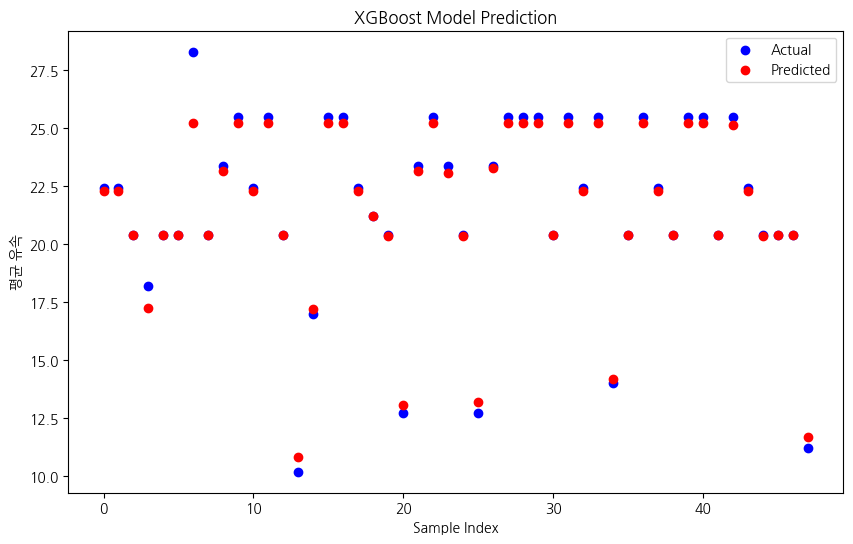

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_test)), y_pred_test, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('평균 유속')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

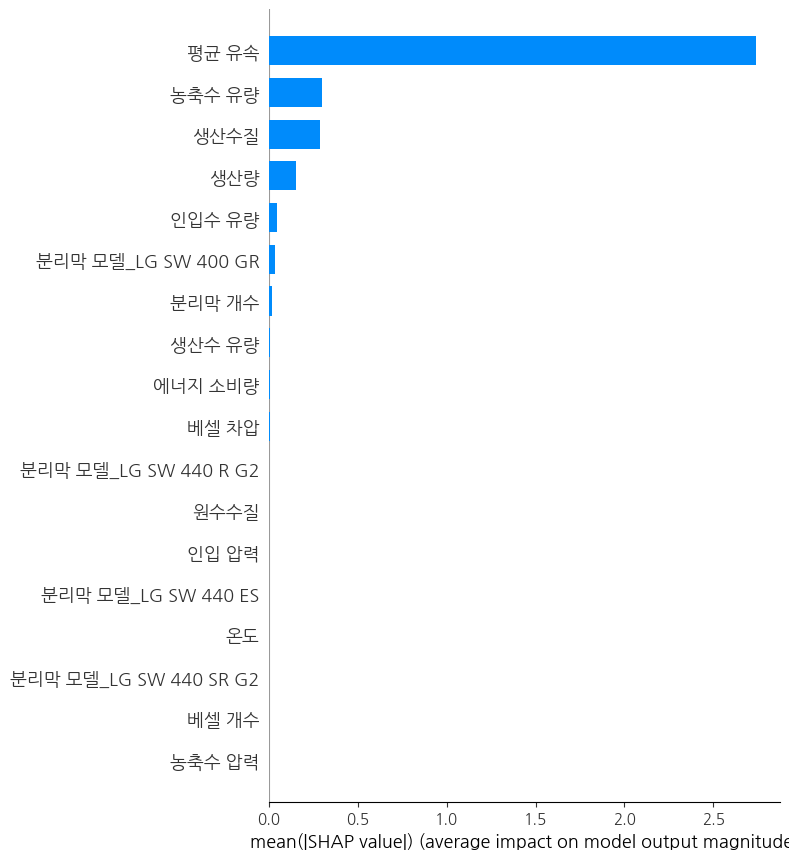

In [ ]:
# SHAP 분석
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
# XGBoost 시각화 - Bokeh 사용
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

# 데이터 준비
source_xgb = ColumnDataSource(data={
    'Actual': y_test.values,
    'Predicted': y_pred_test,
    'Index': list(range(len(y_test)))
})

# XGBoost 시각화
p_xgb = figure(title=f'XGBoost Model - Actual vs Predicted (R²: {r2_test:.4f})',
               x_axis_label='Actual Values',
               y_axis_label='Predicted Values',
               width=800, height=400)
p_xgb.scatter('Actual', 'Predicted', size=10, source=source_xgb, color='#FF6F61', alpha=0.7)
p_xgb.line(x='Actual', y='Actual', source=source_xgb, color='skyblue', line_width=2, legend_label='Ideal Line')

hover_xgb = HoverTool()
hover_xgb.tooltips = [
    ("Actual", "@Actual"),
    ("Predicted", "@Predicted"),
    ("Index", "@Index")
]
p_xgb.add_tools(hover_xgb)

p_xgb.legend.label_text_font_size = '10pt'
show(p_xgb)

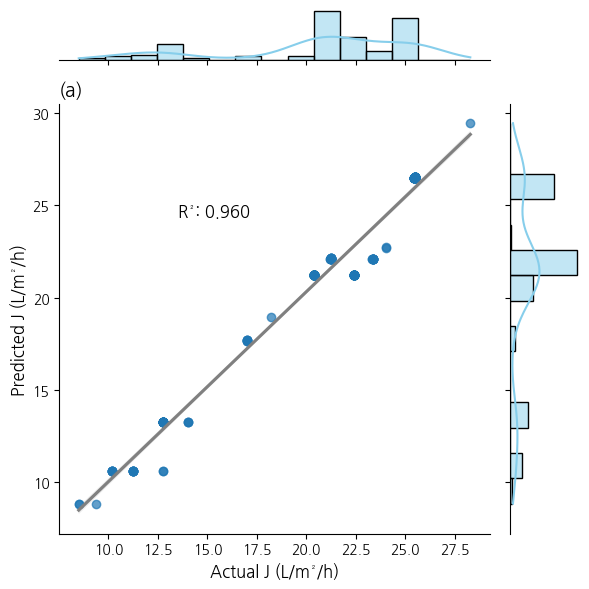

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

y_test = temp_10['평균 유속'].astype(float).values
y_pred = temp_10['생산수 유량'].astype(float).values / (temp_10['분리막 개수'].astype(float).values * temp_10['베셀 개수'].astype(float).values)

scale_factor = np.median(y_test) / np.median(y_pred)
y_pred = y_pred * scale_factor

q1 = np.percentile(y_test, 1.5)
q3 = np.percentile(y_test, 98.5)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
mask = (y_test >= lower_bound) & (y_test <= upper_bound)
y_test = y_test[mask]
y_pred = y_pred[mask]

additional_mask = ~((y_test > 20) & (y_pred < 5))
y_test = y_test[additional_mask]
y_pred = y_pred[additional_mask]

# R² 값 계산
r2 = r2_score(y_test, y_pred)

# 산점도 및 회귀선 플롯과 분포도 포함
g = sns.jointplot(
    x=y_test, y=y_pred, kind="reg",
    scatter_kws={'alpha': 0.7}, line_kws={'color': 'gray'},
    marginal_kws={'bins': 15, 'fill': True, 'color': 'skyblue'}
)

# R² 값 추가 (산점도 영역에)
g.ax_joint.text(min(y_test) + 5, max(y_pred) - 5, f"R²: {r2:.3f}", fontsize=12, color='black')

# 그래프 꾸미기
g.ax_joint.set_xlabel("Actual J (L/m²/h)", fontsize=12)
g.ax_joint.set_ylabel("Predicted J (L/m²/h)", fontsize=12)
g.ax_joint.set_title("(a)", fontsize=14, loc='left')
plt.tight_layout()

# 그래프 출력
plt.show()
